In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib_venn import venn2, venn2_circles, venn3
from supervenn import supervenn
import sys
sys.path.append("/home/danya-2003/pyvenn")
import venn

In [2]:
df1 = pd.read_table('/home/danya-2003/Downloads/ctd/ctd_switched_promoters/Kulakovsky/CTD2587H24_ASO_G0267577_01.tsv', sep='\t')
df2 = pd.read_table('/home/danya-2003/Downloads/ctd/ctd_switched_promoters/Kulakovsky/CTD2587H24_ASO_G0267577_03.tsv', sep='\t')
matr=pd.read_csv("~/Downloads/fantom//expression.tpm.gene.ASO.tsv", sep='\t', header=None)
nc=pd.read_csv("~/Downloads/fantom/expression.tpm.gene.None.tsv", sep='\t', header=None)
deg = pd.read_table('/home/danya-2003/Downloads/ctd/oligo_DE_Summary_promoter.tsv', sep='\t')
df1 = df1.set_index(keys = 'prmtrID', drop=False)
df2 = df2.set_index(keys = 'prmtrID', drop=False)

/tmp/ipykernel_11109/3108875883.py:3: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262

In [3]:
### STATISTICS

# list of numbers of items in df_dict
def item_num (df_dict):
    num=[]
    for key in df_dict:
        items=df_dict.get(key)
        num.append(len(items))
    return num

#find common elements between two lists
def common_elements_list(list1, list2):
    result = []
    for element in list1:
        if element in list2:
            result.append(element)
    return result

#find common elements between two lists
def common_elements_list_df(list1, df1):
    result = []
    list2 = df1.index.tolist()
    for element in list1:
        if element in list2:
            result.append(element)
    return result

#find common elements between two dfs
def common_elements_df(df1, df2):
    list1 = df1.index.tolist()
    list2 = df2.index.tolist()
    result = []
    for element in list1:
        if element in list2:
            result.append(element)
    return result

In [4]:
### STAT
print('df1_prmtrs =', len(df1.index.tolist()))
print('df2_prmtrs =', len(df2.index.tolist()))
print('df1_df2_common_prmtrs =', len(common_elements_df(df1, df2)))
print('')
print('df1_genes =', len(df1.geneName.unique()))
print('df2_genes =', len(df2.geneName.unique()))
print('df1_df2_common_genes =', len(common_elements_list(df1.geneName.unique(), df2.geneName.unique())))

df1_prmtrs = 20925
df2_prmtrs = 20437
df1_df2_common_prmtrs = 20301

df1_genes = 6825
df2_genes = 6685
df1_df2_common_genes = 6655


In [5]:
# table with indexes (prmtrID) and columns geneID and prmtrID
def get_df_for_dict(df):
    df_for_dict = df[["geneID", "prmtrID"]]
    return df_for_dict

# dictionary with keys - genes, and values - lists of their promoters
def get_df_dict(df_for_dict):
    df_dict = {}
    for index, row in df_for_dict.iterrows():
        gene_id = df_for_dict.loc[index].values[0]
        if gene_id not in df_dict:
            df_dict[gene_id] = list()
        df_dict[gene_id].append(index)
    return df_dict

#table with columns chr, start, end and strand to find distances
def get_df_coor(df):
    df_coor = df
    df_coor[['chr','start', 'end', 'strand']] = df_coor['prmtrID'].str.split('_',expand=True)
    df_coor = df_coor[['geneID', 'prmtrID', 'prmtrCoef', 'chr','start', 'end', 'strand']]
    return df_coor

#table with promoters of one gene with distance from 150 to 2000

def get_distanted (df_dict, df_coor):
    
    distanced = pd.DataFrame(columns=['gene', 'prmtr'])
    for key in df_dict:
        promoters=df_dict.get(key)
        dim = len(promoters)
        dist = pd.DataFrame(columns=promoters,
                      index=promoters)
        for col in dist:
            a_start = int(df_coor.loc[col].values[4])
            a_end = int(df_coor.loc[col].values[5])
            for row in dist:
                b_start = int(df_coor.loc[row].values[4])
                b_end = int(df_coor.loc[row].values[5])
            
                if (a_start < b_start) & (a_end < b_start):
                    dist.at[col, row] = b_start - a_end
                elif (b_start < a_start) & (b_end < a_start):
                    dist.at[col, row] = a_start - b_end
                else:
                    dist.at[col, row] = 0
        
        dist[dist < 150] = 0
        dist[dist > 2000] = 0
        
        v = dist.sum(axis=0)
        
        for row in v.index:                
            if v[row] > 0:
                #new_row = {'gene':key, 'prmtr':row}
                #distanced=distanced.append(new_row, ignore_index=True)
                new_row = [key, row]
                distanced.loc[len(distanced)] = new_row


    return distanced

In [6]:
# get filtered tables with prmtrs only with distance >150 and <2000 n
df_for_dict_1 = get_df_for_dict(df1)
dict_df1 = get_df_dict(df_for_dict_1)
coor_df1 = get_df_coor(df1)
distanted_df1 = get_distanted(dict_df1,coor_df1)
df1_dist = df1[df1.index.isin(distanted_df1.prmtr.tolist())]

df_for_dict_2 = get_df_for_dict(df2)
dict_df2 = get_df_dict(df_for_dict_2)
coor_df2 = get_df_coor(df2)
distanted_df2 = get_distanted(dict_df2,coor_df2)
df2_dist = df2[df2.index.isin(distanted_df2.prmtr.tolist())]

In [7]:
### STAT
print('df1_dist_prmtrs =', len(df1_dist.index.tolist()))
print('df2_dist_prmtrs =', len(df2_dist.index.tolist()))
print('df1_df2_dist_common_prmtrs =', len(common_elements_df(df1_dist, df2_dist)))
print('')
print('df1_dist_genes =', len(df1_dist.geneName.unique()))
print('df1_dist_genes =', len(df2_dist.geneName.unique()))
print('df1_df2_dist_common_genes =', len(common_elements_list(df1_dist.geneName.unique(), df2_dist.geneName.unique())))

df1_dist_prmtrs = 8601
df2_dist_prmtrs = 8235
df1_df2_dist_common_prmtrs = 8099

df1_dist_genes = 2592
df1_dist_genes = 2485
df1_df2_dist_common_genes = 2442


In [8]:
#table with switched promoters; FDR < 0.05; prmtrPV < 0.05
def get_switched(df_dist):
    switched = df_dist[(df_dist["geneFDR"] < 0.05) & (df_dist["prmtrPv"] < 0.05)]
    switched = switched[["geneID", "prmtrID", "prmtrCoef"]]
    return switched

#table with unswitched promoters; FDR < 0.05; prmtrPV >= 0.05
def get_unswitched(df_dist):
    unswitched = df_dist[(df_dist["geneFDR"] < 0.05) | (df_dist["prmtrPv"] > 0.05)]
    unswitched = unswitched[["geneID", "prmtrID", "prmtrCoef"]]
    return unswitched

In [9]:
# get switched and unswitched prmtrs
switched_df1 = get_switched(df1_dist)
switched_df2 = get_switched(df2_dist)
unswitched_df1 = get_unswitched(df1_dist)
unswitched_df2 = get_unswitched(df2_dist)

# switch on and switch off

switch_plus_01 = switched_df1[switched_df1['prmtrCoef'] > 0 ]
switch_minus_01 = switched_df1[switched_df1['prmtrCoef'] < 0 ]
switch_plus_03 = switched_df2[switched_df2['prmtrCoef'] > 0 ]
switch_minus_03 = switched_df2[switched_df2['prmtrCoef'] < 0 ]

# get COMMON switched and unswitched prmtrs

switched = switched_df1[switched_df1.prmtrID.isin(switched_df2.prmtrID.tolist())]
unswitched = unswitched_df1[unswitched_df1.prmtrID.isin(unswitched_df2.prmtrID.tolist())]

In [10]:
### STAT

print('df1_switched_prmtrs =', len(switched_df1.index.tolist()))
print('df2_switched_prmtrs =', len(switched_df2.index.tolist()))
print('switched_prmtrs =', len(switched.index.tolist()))
print('')
print('df1_unswitched_prmtrs =', len(unswitched_df1.index.tolist()))
print('df2_unswitched_prmtrs =', len(unswitched_df2.index.tolist()))
print('unswitched_prmtrs =', len(unswitched.index.tolist()))
print('')
print('')
print('df1_switched_genes =', len(switched_df1.geneID.unique()))
print('df2_switched_genes =', len(switched_df2.geneID.unique()))
print('switched_genes =', len(switched.geneID.unique()))
print('')
print('df1_unswitched_genes =', len(unswitched_df1.geneID.unique()))
print('df2_unswitched_genes =', len(unswitched_df2.geneID.unique()))
print('unswitched_genes =', len(unswitched.geneID.unique()))

df1_switched_prmtrs = 1046
df2_switched_prmtrs = 537
switched_prmtrs = 220

df1_unswitched_prmtrs = 8545
df2_unswitched_prmtrs = 8179
unswitched_prmtrs = 7997


df1_switched_genes = 659
df2_switched_genes = 389
switched_genes = 167

df1_unswitched_genes = 2593
df2_unswitched_genes = 2484
unswitched_genes = 2440


In [11]:
### Насколько различаются реплики ASO по экспрессии

matr[226] = pd.to_numeric(matr[226], errors='coerce', downcast = 'float')
matr[240] = pd.to_numeric(matr[240], errors='coerce', downcast = 'float')
matr[195] = pd.to_numeric(matr[195], errors='coerce', downcast = 'float')
matr[259] = pd.to_numeric(matr[259], errors='coerce', downcast = 'float')


rna_id_01=pd.DataFrame(((matr[226][11:124058]+matr[240][11:124058])/2)+1).astype(float)
rna_id_01=np.log10(rna_id_01)
expr_01=rna_id_01.sort_values(by=0)[0]
ensg_01=[]
for elem in (rna_id_01.sort_values(by=0).index):
    ensg_01.append(matr[0][elem])
df_expr_01=pd.DataFrame({"ensg":ensg_01, "expr":expr_01})
max_expr_01=df_expr_01.iloc[-1, 1]
                    
high_01=df_expr_01[df_expr_01["expr"]>= 0.2*max_expr_01]["ensg"].to_list()
low_01=df_expr_01[(df_expr_01["expr"]<= 0.2*max_expr_01) & (df_expr_01["expr"] != 0)]["ensg"].to_list()
zero_01=df_expr_01[df_expr_01["expr"]== 0]["ensg"].to_list()

rna_id_03=pd.DataFrame(((matr[195][11:124058]+matr[259][11:124058])/2)+1).astype(float)
rna_id_03=np.log10(rna_id_03)
expr_03=rna_id_03.sort_values(by=0)[0]
ensg_03=[]
for elem in (rna_id_03.sort_values(by=0).index):
    ensg_03.append(matr[0][elem])
df_expr_03=pd.DataFrame({"ensg":ensg_03, "expr":expr_03})
max_expr_03=df_expr_03.iloc[-1, 1]

high_03=df_expr_03[df_expr_03["expr"]>= 0.2*max_expr_03]["ensg"].to_list()
low_03=df_expr_03[(df_expr_03["expr"]<= 0.2*max_expr_03) & (df_expr_03["expr"] != 0)]["ensg"].to_list()
zero_03=df_expr_03[df_expr_03["expr"]== 0]["ensg"].to_list()

print('high_expressed_genes_01', len(high_01))
print('high_expressed_genes_03', len(high_03))
print('')
print('low_expressed_genes_01', len(low_01))
print('low_expressed_genes_03', len(low_03))
print('')
print('zero_expressed_genes_01', len(zero_01))
print('zero_expressed_genes_03', len(zero_03))
print('')
print('')
print('high_01 common with high_03', len(common_elements_list(high_01,high_03)))
print('high_01 common with low_03', len(common_elements_list(high_01,low_03)))
print('high_01 common with zero_03', len(common_elements_list(high_01,zero_03)))
print('')
print('low_01 common with high_03', len(common_elements_list(low_01,high_03)))
print('low_01 common with low_03', len(common_elements_list(low_01,low_03)))
print('low_01 common with zero_03', len(common_elements_list(low_01,zero_03)))
print('')
print('zero_01 common with high_03', len(common_elements_list(zero_01,high_03)))
print('zero_01 common with low_03', len(common_elements_list(zero_01,low_03)))
print('zero_01 common with zero_03', len(common_elements_list(zero_01,zero_03)))
print('')
print('')
print('high_03 common with high_01', len(common_elements_list(high_03,high_01)))
print('high_03 common with low_01', len(common_elements_list(high_03,low_01)))
print('high_03 common with zero_01', len(common_elements_list(high_03,zero_01)))
print('')
print('low_03 common with high_01', len(common_elements_list(low_03,high_01)))
print('low_03 common with low_01', len(common_elements_list(low_03,low_01)))
print('low_03 common with zero_01', len(common_elements_list(low_03,zero_01)))
print('')
print('zero_03 common with high_01', len(common_elements_list(zero_03,high_01)))
print('zero_03 common with low_01', len(common_elements_list(zero_03,low_01)))
print('zero_03 common with zero_01', len(common_elements_list(zero_03,zero_01)))

high_expressed_genes_01 11120
high_expressed_genes_03 11369

low_expressed_genes_01 25044
low_expressed_genes_03 24408

zero_expressed_genes_01 87883
zero_expressed_genes_03 88270


high_01 common with high_03 10515
high_01 common with low_03 605
high_01 common with zero_03 0

low_01 common with high_03 854
low_01 common with low_03 17240
low_01 common with zero_03 6950

zero_01 common with high_03 0
zero_01 common with low_03 6563
zero_01 common with zero_03 81320


high_03 common with high_01 10515
high_03 common with low_01 854
high_03 common with zero_01 0

low_03 common with high_01 605
low_03 common with low_01 17240
low_03 common with zero_01 6563

zero_03 common with high_01 0
zero_03 common with low_01 6950
zero_03 common with zero_01 81320


In [12]:
# HIGH, LOW AND ZERO EXPRESSED GENES

rna_id_01_03=pd.DataFrame(((matr[226][11:124058]+matr[240][11:124058]+matr[195][11:124058]+matr[259][11:124058])/4)+1).astype(float)
rna_id_01_03=np.log10(rna_id_01_03)
expr_01_03=rna_id_01_03.sort_values(by=0)[0]
ensg_01_03=[]
for elem in (rna_id_01_03.sort_values(by=0).index):
    ensg_01_03.append(matr[0][elem])
df_expr_01_03=pd.DataFrame({"ensg":ensg_01_03, "expr":expr_01_03})
max_expr_01_03=df_expr_01_03.iloc[-1, 1]
                    
high_01_03=df_expr_01_03[df_expr_01_03["expr"]>= 0.2*max_expr_01_03]["ensg"].to_list()
low_01_03=df_expr_01_03[(df_expr_01_03["expr"]<= 0.2*max_expr_01_03) & (df_expr_01_03["expr"] != 0)]["ensg"].to_list()
zero_01_03=df_expr_01_03[df_expr_01_03["expr"]== 0]["ensg"].to_list()


nc[1] = pd.to_numeric(nc[1], errors='coerce', downcast = 'float')
nc[2] = pd.to_numeric(nc[2], errors='coerce', downcast = 'float')
nc[3] = pd.to_numeric(nc[3], errors='coerce', downcast = 'float')
nc[4] = pd.to_numeric(nc[4], errors='coerce', downcast = 'float')

nc_id = pd.DataFrame(((nc[1][11:124058]+nc[2][11:124058]+nc[3][11:124058]+nc[4][11:124058])/4)+1).astype(float)
nc_id = np.log10(nc_id)
expr_nc = nc_id.sort_values(by=0)[0]
ensg_nc = []
for elem in (nc_id.sort_values(by=0).index):
    ensg_nc.append(nc[0][elem])
df_nc=pd.DataFrame({"ensg":ensg_nc, "expr":expr_nc})
max_expr_nc=df_nc.iloc[-1, 1]
high_nc=df_nc[df_nc["expr"]>= 0.2*max_expr_nc]["ensg"].to_list()
low_nc=df_nc[(df_nc["expr"]<= 0.2*max_expr_nc) & (df_nc["expr"] != 0)]["ensg"].to_list()
zero_nc=df_nc[df_nc["expr"]== 0]["ensg"].to_list()

In [13]:
### STAT

print('high_expressed_genes', len(high_01_03))
print('high_expressed_genes_nc', len(high_nc))
print('')
print('low_expressed_genes', len(low_01_03))
print('low_expressed_genes_nc', len(low_nc))
print('')
print('zero_expressed_genes', len(zero_01_03))
print('zero_expressed_genes_nc', len(zero_nc))

high_expressed_genes 11291
high_expressed_genes_nc 10982

low_expressed_genes 31436
low_expressed_genes_nc 22309

zero_expressed_genes 81320
zero_expressed_genes_nc 90756


In [14]:
# DEGs
df_degs = deg[(deg["KD.geneSymbol"] == "CTD-2587H24.5") & (abs(deg["log2FC"]) > 0.5) & (abs(deg["ZScore"]) > 1.645) & (deg["fdr"] < 0.05) ]
df_undegs = deg[(deg["KD.geneSymbol"] == "CTD-2587H24.5") & ((abs(deg["log2FC"]) < 0.5) | (abs(deg["ZScore"]) < 1.645) | (deg["fdr"] > 0.05))]
df_degs = df_degs.set_index(keys = 'prmtrID', drop=False)
df_undegs = df_undegs.set_index(keys = 'prmtrID', drop=False)

In [15]:
### STAT
print('DEGs', len(df_degs.index.to_list()))
print('nonDEGs', len(df_undegs.index.to_list()))
print('')
print('')
print('df1_switched_common_with_DEGs', len(common_elements_df(df_degs,switched_df1)))
print('df2_switched_common_with_DEGs', len(common_elements_df(df_degs,switched_df2)))
print('switched_common_with_DEGs', len(common_elements_df(df_degs,switched)))
print('')
print('df1_unswitched_common_with_DEGs', len(common_elements_df(df_degs,unswitched_df1)))
print('df2_unswitched_common_with_DEGs', len(common_elements_df(df_degs,unswitched_df2)))
print('unswitched_common_with_DEGs', len(common_elements_df(df_degs,unswitched)))
print('')
print('')
print('df1_switched_common_with_nonDEGs', len(common_elements_df(df_undegs,switched_df1)))
print('df2_switched_common_with_nonDEGs', len(common_elements_df(df_undegs,switched_df2)))
print('switched_common_with_nonDEGs', len(common_elements_df(df_undegs,switched)))
print('')
print('df1_unswitched_common_with_nonDEGs', len(common_elements_df(df_undegs,unswitched_df1)))
print('df2_unswitched_common_with_nonDEGs', len(common_elements_df(df_undegs,unswitched_df2)))
print('unswitched_common_with_nonDEGs', len(common_elements_df(df_undegs,unswitched)))

DEGs 20169
nonDEGs 39121


df1_switched_common_with_DEGs 1118
df2_switched_common_with_DEGs 705
switched_common_with_DEGs 329

df1_unswitched_common_with_DEGs 5534
df2_unswitched_common_with_DEGs 5230
unswitched_common_with_DEGs 5078


df1_switched_common_with_nonDEGs 874
df2_switched_common_with_nonDEGs 359
switched_common_with_nonDEGs 111

df1_unswitched_common_with_nonDEGs 10175
df2_unswitched_common_with_nonDEGs 9852
unswitched_common_with_nonDEGs 9663


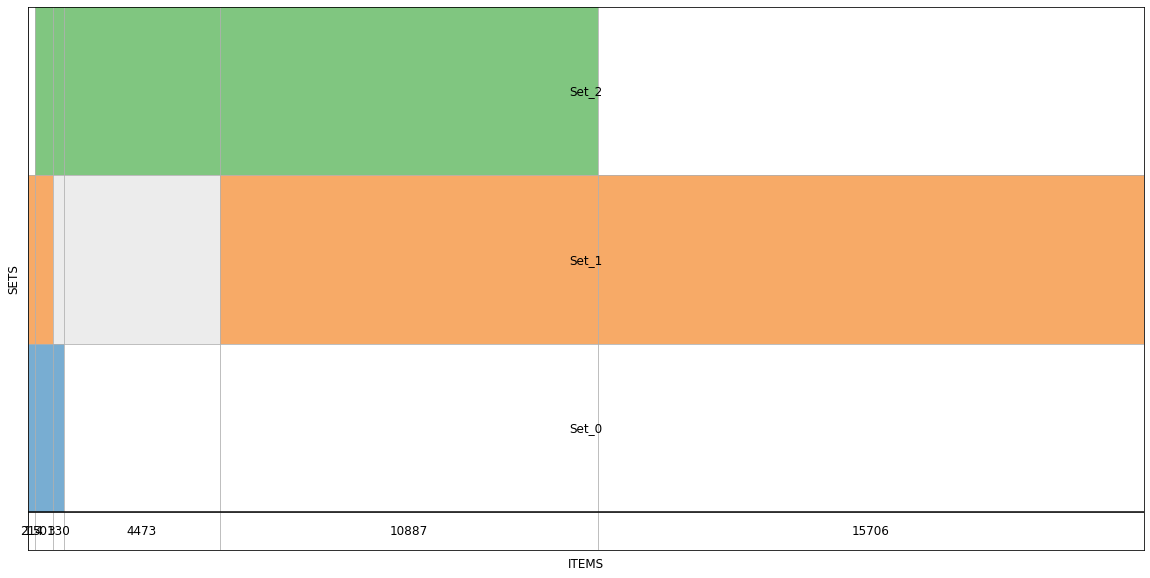

In [31]:
a1 = df_degs.index.to_list()
b1 = df_undegs.index.to_list()
c1 = switched_df1.index.to_list()
a = set(a1)
b = set(b1)
c = set(c1)
sets = [c, b, a]
plt.figure(figsize=(20, 10))
supervenn(sets, side_plots=False)

In [ ]:
len(df_undegs.index.to_list())

In [ ]:
labels = venn.get_labels([df_degs.index.to_list(), df_undegs.index.to_list(), switched_df1.index.to_list()])

In [ ]:
labels

In [ ]:
fig, ax = venn.venn3(labels, names=['list 1', 'list 2', 'list 3'])
fig.show()

In [ ]:
### STAT

labels = venn.get_labels([
            range(10),
            range(5, 15)
        ], fill=['number', 'logic'])
print (labels)
    
    
    

In [ ]:
# list with distances between promoters
def get_distances (df_dict, df_coor):
    distances = [] 
    flatten_distances = []
    for key in df_dict:
        promoters=df_dict.get(key)
        dist = pd.DataFrame(columns=promoters,
                      index=promoters)
        for col in dist:
            a_start = int(df_coor.loc[col].values[4])
            a_end = int(df_coor.loc[col].values[5])
            for row in dist:
                b_start = int(df_coor.loc[row].values[4])
                b_end = int(df_coor.loc[row].values[5])
            
                if (a_start < b_start) & (a_end <= b_start):
                    dist.at[col, row] = b_start - a_end
                elif (b_start < a_start) & (b_end <= a_start):
                    dist.at[col, row] = np.NaN
                else:
                    dist.at[col, row] = np.NaN
        distances.extend(dist.values.tolist())
        
  
    for sublist in distances:
        for val in sublist:
            flatten_distances.append(val)
          
    return flatten_distances


In [ ]:
# get filtered tables with prmtrs only with distance >150 and <2000 n
df_for_dict = get_df_for_dict(df1_dist)
dict_df = get_df_dict(df_for_dict)
coor_df = get_df_coor(df1_dist)
distanted_df = get_distanted(dict_df,coor_df)
df_dist = df1_dist[df1_dist.index.isin(distanted_df.prmtr.tolist())]
distances=get_distances(dict_df, coor_df)

In [ ]:
a=0
for i in distances:
    if i > 50000:
        a+=1
print(a)

In [ ]:
distances = [x for x in distances if x == x]
distances_1 = [x for x in distances if x < 2000]
distances_2 = [x for x in distances if x < 10000]

In [ ]:
distances

In [ ]:
import seaborn as sns

In [ ]:
sns.histplot(data = distances, binwidth = 25, stat = 'count')

In [ ]:
sns.histplot(data = distances_1, binwidth = 25, stat = 'count')

In [ ]:
df1_distances = get_distances(df1_dict, df1_coor)
df1_distances_cleaned = [x for x in df1_distances if str(x) != 'nan']
zero1=0
for i in df1_distances_cleaned:
    if i == 0:
        zero1+=1
df1_distances_cleaned = [i for i in df1_distances_cleaned if i != 0]
df1_distances_cleaned.sort()
distances_1 = pd.DataFrame({'promoters': df1_distances_cleaned})

df2_distances = get_distances(df2_dict, df2_coor)
df2_distances_cleaned = [x for x in df2_distances if str(x) != 'nan']
zero2=0
for i in df2_distances_cleaned:
    if i == 0:
        zero2+=1
df2_distances_cleaned = [i for i in df2_distances_cleaned if i != 0]
distances_2 = pd.DataFrame({'promoters': df2_distances_cleaned})

print('zero_distances_1', zero1)
print('zero_distances_2', zero2)

In [ ]:
sns.histplot(data=distances_1)

In [ ]:
sns.histplot(data=distances_2)

In [ ]:
large1=0
for i in df1_distances_cleaned:
    if i > 100000:
        large1+=1
df1_distances_cleaned = [i for i in df1_distances_cleaned if i < 100000]
distances_1 = pd.DataFrame({'promoters': df1_distances_cleaned})

large2=0
for i in df2_distances_cleaned:
    if i > 100000:
        large2+=1
df2_distances_cleaned = [i for i in df2_distances_cleaned if i < 100000]
distances_2 = pd.DataFrame({'promoters': df2_distances_cleaned})

print('large_distances_1', large1)
print('large_distances_2', large2)

In [ ]:
sns.histplot(data=distances_1)

In [ ]:
sns.histplot(data=distances_2)

In [ ]:
large1=0
for i in df1_distances_cleaned:
    if i > 2000:
        large1+=1
df1_distances_cleaned = [i for i in df1_distances_cleaned if i < 2000]
distances_1 = pd.DataFrame({'promoters': df1_distances_cleaned})

large2=0
for i in df2_distances_cleaned:
    if i > 2000:
        large2+=1
df2_distances_cleaned = [i for i in df2_distances_cleaned if i < 2000]
distances_2 = pd.DataFrame({'promoters': df2_distances_cleaned})

print('large_distances_1', large1)
print('large_distances_2', large2)

In [ ]:
sns.histplot(data=distances_1)

In [ ]:
sns.histplot(data=distances_2)

In [ ]:
df1_item_num = item_num(df1_dict)
df2_item_num = item_num(df2_dict)

In [ ]:
sns.histplot(data=df1_item_num)

In [ ]:
sns.histplot(data=df1_item_num)

In [ ]:
for_zenbu = get_distanted(df2_dict, df2_coor, 150, 1500)
for_zenbu

In [ ]:
            if (a_start > b_start) & (a_end < b_end):
                dist.at['col', 'row'] = 0
            if (b_start > a_start) & (b_end < a_end):
                dist.at['col', 'row'] = 0
            if (a_start < b_start) & (a_end < b_end) & (a_end > b_start):
                dist.at['col', 'row'] = 0
            if (b_start < a_start) & (b_end < a_end) & (b_end > a_start):
                dist.at['col', 'row'] = 0
            if (a_start == b_start):
                dist.at['col', 'row'] = 0
            if (a_end == b_end):
                dist.at['col', 'row'] = 0